# Membership function definition
Linguistic variables and terms:

| Linguistic variable | Linguistic term 0 | Linguistic term 1 | Linguistic term 2 |
|---------------------|-------------------|-------------------|-------------------|
| temperature         | normal            | hot               | cold              ||
| headache            | no_pain           | mild              | severe            ||
| age                 | young             | mid               | old               ||

|linguistic variable | term 0 | term 1 | term2    | term3   | term4  | term5            | term6    |
|--------------------|--------|--------|----------|---------|--------|------------------|----------|
| urgency            | stable | mild   | moderate | serious | severe | life-threatening | critical |
	0.	Stable (Healthy, no immediate issues)
	1.	Mild (Minor symptoms, low urgency)
	2.	Moderate (Noticeable symptoms, moderate urgency)
	3.	Serious (Worsening condition, needs prompt attention)
	4.	Severe (Critical symptoms, requires immediate care)
	5.	Life-threatening (At risk of death, urgent intervention needed)
	6.	Critical (Extremely severe, requires intensive and immediate care)


In [10]:
from matplotlib import pyplot as plt
from numpy.lib.function_base import meshgrid


def visualize(linguistic_var):
    # Plot the membership functions
    plt.figure()

    # Plot each membership function individually
    for label in linguistic_var.terms:
        plt.plot(linguistic_var.universe, linguistic_var[label].mf, label=label)

    # Labeling and display
    plt.title(f'{linguistic_var} Membership Functions')
    plt.xlabel(f'{linguistic_var}')
    plt.ylabel('Membership')
    plt.legend(loc='best')
    plt.show()

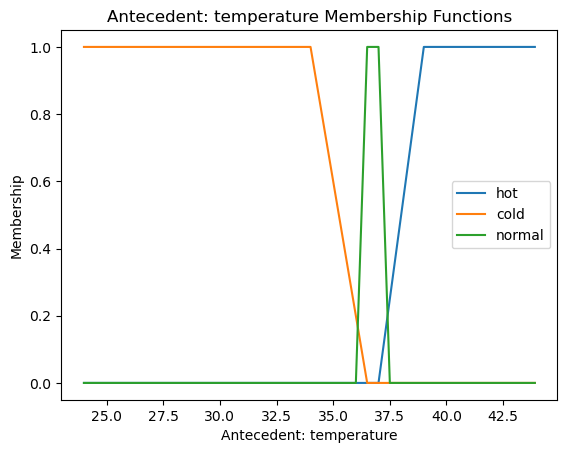

In [11]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# define the inputs and outputs
temperature = ctrl.Antecedent(np.arange(24, 44, 0.1), 'temperature')
headache = ctrl.Antecedent(np.arange(0, 10, 0.01), 'headache')
age = ctrl.Antecedent(np.arange(0, 130, 1), 'age')
urgency = ctrl.Consequent(np.arange(0, 100, 0.01), 'urgency')

# define the membership function temperature
temperature['hot'] = fuzz.trapmf(temperature.universe, [37, 39, 44, 44])
temperature['cold'] = fuzz.trapmf(temperature.universe, [24, 24, 34, 36.5])
temperature['normal'] = fuzz.trapmf(temperature.universe, [36, 36.5, 37, 37.5])

visualize(temperature)

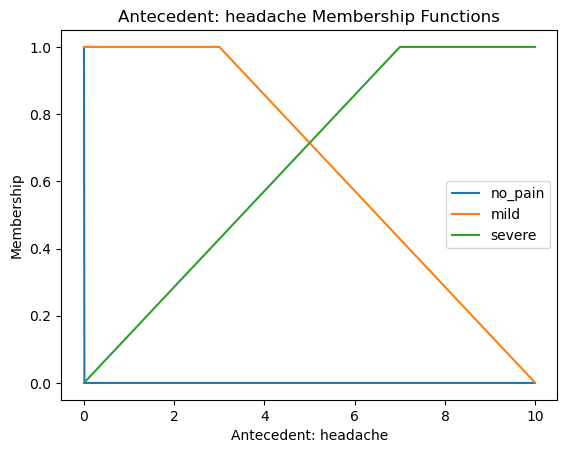

In [12]:
# define the membership function of headache
headache['no_pain'] = fuzz.trapmf(headache.universe, [0, 0, 0, 0])
headache['mild'] = fuzz.trapmf(headache.universe, [0, 0, 3, 10])
headache['severe'] = fuzz.trapmf(headache.universe, [0, 7, 10, 10])
visualize(headache)

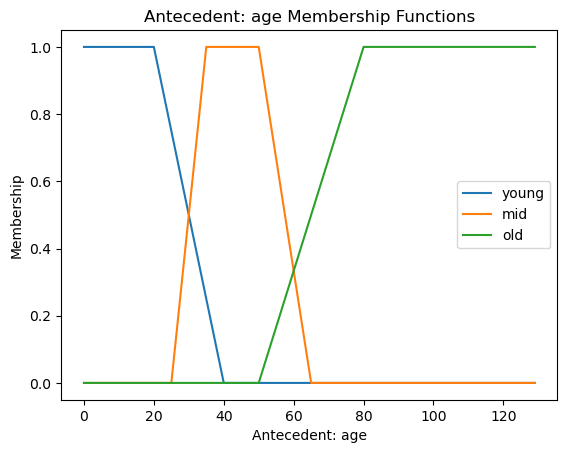

In [13]:
# define the membership function of age
age['young'] = fuzz.trapmf(age.universe, [0, 0, 20, 40])
age['mid'] = fuzz.trapmf(age.universe, [25, 35, 50, 65])
age['old'] = fuzz.trapmf(age.universe, [50, 80, 130, 130])
visualize(age)

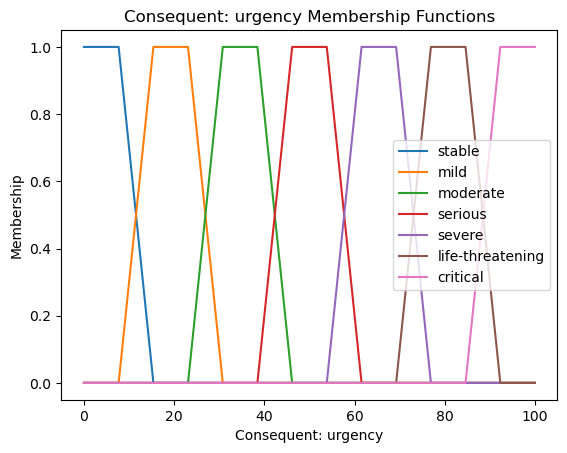

In [14]:
# define the membership function of urgency
number_of_labels = 7
seg = 100 / (2 * number_of_labels - 1)
urgency['stable'] = fuzz.trapmf(urgency.universe, [0, 0, seg, 2 * seg])
urgency['mild'] = fuzz.trapmf(urgency.universe, [seg, 2 * seg, 3 * seg, 4 * seg])
urgency['moderate'] = fuzz.trapmf(urgency.universe, [3 * seg, 4 * seg, 5 * seg, 6 * seg])
urgency['serious'] = fuzz.trapmf(urgency.universe, [5 * seg, 6 * seg, 7 * seg, 8 * seg])
urgency['severe'] = fuzz.trapmf(urgency.universe, [7 * seg, 8 * seg, 9 * seg, 10 * seg])
urgency['life-threatening'] = fuzz.trapmf(urgency.universe, [9 * seg, 10 * seg, 11 * seg, 12 * seg])
urgency['critical'] = fuzz.trapmf(urgency.universe, [11 * seg, 12 * seg, 13 * seg, 13 * seg])
visualize(urgency)

# Define the rules

use coding to represent the rule, e.g. If temperature is hot(1), and headache is no_pain(0), and you are young(0), then you are little urgent(1). This rule will be represented as 1001 (first three are the antecedent, the last one is consequent)

| temperature | headache | age  | urgency           |
|-------------|----------|------|-------------------|
| normal      | no_pain  | young | stable           |
| normal      | no_pain  | mid   | stable           |
| normal      | no_pain  | old   | stable           |
| normal      | mild     | young | mild             |
| normal      | mild     | mid   | moderate         |
| normal      | mild     | old   | serious          |
| normal      | severe   | young | moderate         |
| normal      | severe   | mid   | serious          |
| normal      | severe   | old   | severe           |
| hot         | no_pain  | young | mild             |
| hot         | no_pain  | mid   | moderate         |
| hot         | no_pain  | old   | serious          |
| hot         | mild     | young | moderate         |
| hot         | mild     | mid   | serious          |
| hot         | mild     | old   | severe           |
| hot         | severe   | young | serious          |
| hot         | severe   | mid   | severe           |
| hot         | severe   | old   | life-threatening |
| cold        | no_pain  | young | moderate         |
| cold        | no_pain  | mid   | serious          |
| cold        | no_pain  | old   | severe           |
| cold        | mild     | young | serious          |
| cold        | mild     | mid   | severe           |
| cold        | mild     | old   | life-threatening |
| cold        | severe   | young | severe           |
| cold        | severe   | mid   | life-threatening |
| cold        | severe   | old   | critical         |


In [15]:
rules = [
    ctrl.Rule(temperature['normal'] & headache['no_pain'] & age['young'], urgency['stable']),
    ctrl.Rule(temperature['normal'] & headache['no_pain'] & age['mid'], urgency['stable']),
    ctrl.Rule(temperature['normal'] & headache['no_pain'] & age['old'], urgency['stable']),
    ctrl.Rule(temperature['normal'] & headache['mild'] & age['young'], urgency['mild']),
    ctrl.Rule(temperature['normal'] & headache['mild'] & age['mid'], urgency['moderate']),
    ctrl.Rule(temperature['normal'] & headache['mild'] & age['old'], urgency['serious']),
    ctrl.Rule(temperature['normal'] & headache['severe'] & age['young'], urgency['moderate']),
    ctrl.Rule(temperature['normal'] & headache['severe'] & age['mid'], urgency['serious']),
    ctrl.Rule(temperature['normal'] & headache['severe'] & age['old'], urgency['severe']),
    ctrl.Rule(temperature['hot'] & headache['no_pain'] & age['young'], urgency['mild']),
    ctrl.Rule(temperature['hot'] & headache['no_pain'] & age['mid'], urgency['moderate']),
    ctrl.Rule(temperature['hot'] & headache['no_pain'] & age['old'], urgency['serious']),
    ctrl.Rule(temperature['hot'] & headache['mild'] & age['young'], urgency['moderate']),
    ctrl.Rule(temperature['hot'] & headache['mild'] & age['mid'], urgency['serious']),
    ctrl.Rule(temperature['hot'] & headache['mild'] & age['old'], urgency['severe']),
    ctrl.Rule(temperature['hot'] & headache['severe'] & age['young'], urgency['serious']),
    ctrl.Rule(temperature['hot'] & headache['severe'] & age['mid'], urgency['severe']),
    ctrl.Rule(temperature['hot'] & headache['severe'] & age['old'], urgency['life-threatening']),
    ctrl.Rule(temperature['cold'] & headache['no_pain'] & age['young'], urgency['moderate']),
    ctrl.Rule(temperature['cold'] & headache['no_pain'] & age['mid'], urgency['serious']),
    ctrl.Rule(temperature['cold'] & headache['no_pain'] & age['old'], urgency['severe']),
    ctrl.Rule(temperature['cold'] & headache['mild'] & age['young'], urgency['serious']),
    ctrl.Rule(temperature['cold'] & headache['mild'] & age['mid'], urgency['severe']),
    ctrl.Rule(temperature['cold'] & headache['mild'] & age['old'], urgency['life-threatening']),
    ctrl.Rule(temperature['cold'] & headache['severe'] & age['young'], urgency['severe']),
    ctrl.Rule(temperature['cold'] & headache['severe'] & age['mid'], urgency['life-threatening']),
    ctrl.Rule(temperature['cold'] & headache['severe'] & age['old'], urgency['critical']),
]

# Define the control system


In [16]:
# Create control system
valve_ctrl = ctrl.ControlSystem(rules)
valve_sim = ctrl.ControlSystemSimulation(valve_ctrl)

# Visualize the control surface

In [17]:
temp_visual = np.linspace(24, 44, 20)
headache_visual = np.linspace(0, 10, 10)
age_visual = np.linspace(0, 130, 130)


def get_res(x, y, z):
    valve_sim.input['temperature'] = x
    valve_sim.input['headache'] = y
    valve_sim.input['age'] = z
    valve_sim.compute()
    return valve_sim.output['urgency']


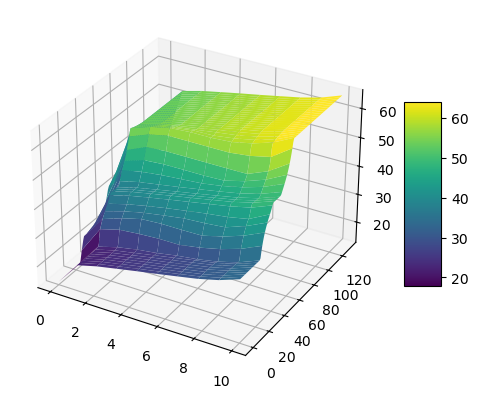

In [18]:
# control temp, see other two
X, Y = meshgrid(headache_visual, age_visual)
Z = np.array([get_res(37, x, y) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

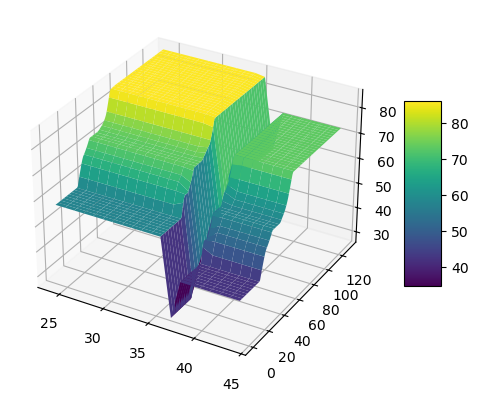

In [19]:
# control headache, see other two
X, Y = meshgrid(temp_visual, age_visual)
Z = np.array([get_res(x, 5, y) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

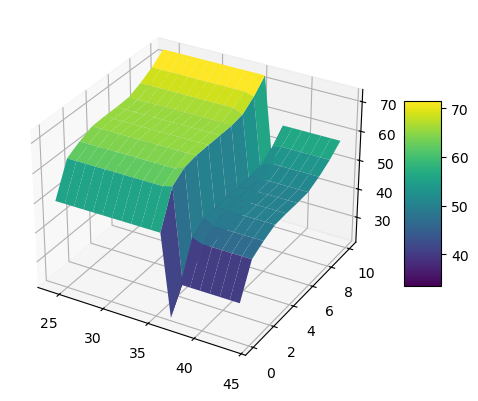

In [20]:
# control age, see other two
X, Y = meshgrid(temp_visual, headache_visual)
Z = np.array([get_res(x, y, 30) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()